imports

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

In [29]:
file = open('distance_color_type_for_all_stars.txt', 'r')
file_csv = open('distance_color_type_for_all_stars_csv.csv', 'w')

header = [
    'ASASSN_id', 'distance', 'distance_low', 'distance_high', 'g_mag', 'Gaia_name', 'G_mag', 'G_mag_err',
    'abs_mag_G', 'abs_mag_G_low', 'abs_mag_G_high', 'ext_correct_G', 'ext_correct_G_low', 'ext_correct_G_high',
    'BP_RP', 'BP_RP_err', 'BP_RP_0', 'BP_RP_0_err', 'J_mag', 'J_mag_err', 'K_mag', 'K_mag_err',
    'abs_mag_J', 'abs_mag_J_low', 'abs_mag_J_high', 'ext_correct_J', 'ext_correct_J_low', 'ext_correct_J_high',
    'ext_correct_K', 'ext_correct_K_low', 'ext_correct_K_high', 'FinalType', 'ML_classifier_type',
    'visual_classification_type', 'VSX_type', 'VSX_RA', 'VSX_Dec', 'VSX_name'
]

file_csv.write(','.join(header) + '\n')

lines = file.readlines()
for line in lines:
    line_split = line.split()
    
    # Remove the first 'ASASSN' entry
    if line_split[0] == 'ASASSN':
        line_split = line_split[1:]
    
    cleaned_data = []
    for item in line_split:
        if '=' in item:
            continue  # Skip items with '='
        cleaned_data.append(item)
    
    # Combine Gaia_name into a single string
    gaia_start = 5  # Adjusted index where Gaia_name starts after removing 'ASASSN'
    gaia_end = 8    # Adjusted index where Gaia_name ends
    gaia_name = ' '.join(cleaned_data[gaia_start:gaia_end])
    cleaned_data = cleaned_data[:gaia_start] + [gaia_name] + cleaned_data[gaia_end:]
    
    # Combine VSX_name into a single string
    vsx_name_start = 37  # Adjusted index where VSX_name starts
    vsx_name = ' '.join(cleaned_data[vsx_name_start:])
    cleaned_data = cleaned_data[:vsx_name_start] + [vsx_name]
    
    print(cleaned_data)
    file_csv.write(','.join(cleaned_data) + '\n')

file.close()
file_csv.close()


['8590948612', '3778', '3484', '4082', '13.245', 'Gaia DR3 2875539776437822592', '12.869', '0.012', '-0.138', '+0.038', '-0.306', '0.121', '0.059', '0.121', '+0.692', '0.045', '+0.633', '0.045', '12.151', '0.022', '11.815', '0.023', '-0.771', '-0.595', '-0.939', '0.036', '0.036', '0.036', '0.015', '0.015', '0.015', 'RRAB', 'RRL_ab', 'NA', 'RRAB', '0.01521', '+35.36286', 'GM And']
['661428773073', '5833', '4946', '7076', '13.951', 'Gaia DR3 2774083440496341504', '15.181', '0.017', '+1.279', '+1.637', '+0.859', '0.073', '0.036', '0.073', '+0.606', '0.069', '+0.570', '0.069', '14.476', '0.033', '14.085', '0.066', '+0.625', '+0.983', '+0.205', '0.022', '0.022', '0.022', '0.009', '0.009', '0.009', 'RRAB', 'RRL_ab', 'NA', 'RRAB', '0.01669', '+18.40698', 'CSS_J000004.0+182425']
['128850052915', '5463', '4555', '6859', '16.166', 'Gaia DR3 2875434876156537472', '15.869', '0.017', '+2.037', '+2.432', '+1.543', '0.145', '0.071', '0.145', '+0.608', '0.067', '+0.537', '0.067', '14.994', '0.052', '1

In [30]:
color_csv = pd.read_csv('distance_color_type_for_all_stars_csv.csv')

In [31]:
color_csv["FinalType"].unique()

array(['RRAB', 'RRC', 'RR(B)', 'CONSTANT', 'POSSIBLY', "I'D", 'EB', 'EW',
       'BY', 'EA', 'SRA', 'CONST', 'SXPHE', 'RS', 'L', 'SRB', 'NEED',
       'GDOR:', 'DSCT', 'BY:', 'INS', 'GDOR', 'CEP:', 'SR', 'SRD', 'NO',
       'DCEP', 'CWA:', 'CEP', 'CEPH'], dtype=object)

In [32]:
exclude_distance_99999 = color_csv[color_csv["distance"] < 99998]
exclude_distance_99999

ASASSN_id  distance  distance_low  distance_high   g_mag  \
0        8590948612      3778          3484           4082  13.245   
1      661428773073      5833          4946           7076  13.951   
2      128850052915      5463          4555           6859  16.166   
3      661427539170     10226          8430          12243  14.876   
4      661428842978      4131          3828           4440  14.566   
...             ...       ...           ...            ...     ...   
13513  661427796091      6432          5373           8116  17.959   
13514  661427808712      3367          2626           6092  16.475   
13515  661427712561      5079          4388           6206  14.657   
13516   77309496316      6097          5480           6760  14.794   
13517  661427797185      8758          6757          11352  19.097   

                          Gaia_name   G_mag  G_mag_err  abs_mag_G  \
0      Gaia DR3 2875539776437822592  12.869      0.012     -0.138   
1      Gaia DR3 2774083440496341504  15.181      0.017      1.279   
2      Gaia DR3 2875434876156537472  15.869      0.017      2.037   
3      Gaia DR3 4689677784096252160  15.459      0.017      0.337   
4      Gaia DR3 2880106185667004928  14.215      0.011      0.796   
...                             ...     ...        ...        ...   
13513  Gaia DR3 4041116866141529344  16.051      0.016      0.142   
13514  Gaia DR3 4041512724666357632  16.559      0.011      9.999   
13515  Gaia DR3 5957201523154466560  15.182      0.009      0.595   
13516  Gaia DR3 1368903285232020736  14.479      0.015      0.408   
13517  Gaia DR3 4041117347131018624  16.546      0.013     -0.033   

       abs_mag_G_low  ...  ext_correct_K  ext_correct_K_low  \
0              0.038  ...          0.015              0.015   
1              1.637  ...          0.009              0.009   
2              2.432  ...          0.019              0.019   
3              0.757  ...          0.009              0.009   
4              0.961  ...          0.043              0.043   
...              ...  ...            ...                ...   
13513          0.533  ...          0.239              0.239   
13514          9.999  ...          0.271              0.241   
13515          0.965  ...          0.135              0.129   
13516          0.640  ...          0.019              0.019   
13517          0.530  ...          0.239              0.239   

       ext_correct_K_high  FinalType  ML_classifier_type  \
0                   0.015       RRAB              RRL_ab   
1                   0.009       RRAB              RRL_ab   
2                   0.019       RRAB              RRL_ab   
3                   0.009       RRAB              RRL_ab   
4                   0.043       RRAB              RRL_ab   
...                   ...        ...                 ...   
13513               0.239       RRAB              RRL_ab   
13514               0.282       NEED              NonVar   
13515               0.141       RRAB              RRL_ab   
13516               0.019       RRAB              RRL_ab   
13517               0.239       RRAB              RRL_ab   

       visual_classification_type  VSX_type     VSX_RA   VSX_Dec  \
0                             NaN      RRAB    0.01521  35.36286   
1                             NaN      RRAB    0.01669  18.40698   
2                             NaN      RRAB    0.03171  34.67397   
3                             NaN      RRAB    0.06821 -72.77875   
4                             NaN      RRAB    0.09900  36.32870   
...                           ...       ...        ...       ...   
13513                         NaN      RRAB  266.65800 -35.25867   
13514                        need      RRAB  266.67208 -34.89022   
13515                         NaN      RRAB  266.67454 -42.40103   
13516                         NaN      RRAB  266.67642  52.75845   
13517                         NaN   RRAB/BL  266.67867 -35.22731   

                    VSX_name  
0             

In [33]:
K_mag_clean_1 = exclude_distance_99999[(exclude_distance_99999["K_mag"] != 99.999)]
K_mag_clean_2 = K_mag_clean_1[K_mag_clean_1["K_mag"] > 1]

K_mag_clean_2

ASASSN_id  distance  distance_low  distance_high   g_mag  \
0        8590948612      3778          3484           4082  13.245   
1      661428773073      5833          4946           7076  13.951   
2      128850052915      5463          4555           6859  16.166   
3      661427539170     10226          8430          12243  14.876   
4      661428842978      4131          3828           4440  14.566   
...             ...       ...           ...            ...     ...   
13512  661427751428      8427          6826          10401  17.571   
13513  661427796091      6432          5373           8116  17.959   
13515  661427712561      5079          4388           6206  14.657   
13516   77309496316      6097          5480           6760  14.794   
13517  661427797185      8758          6757          11352  19.097   

                          Gaia_name   G_mag  G_mag_err  abs_mag_G  \
0      Gaia DR3 2875539776437822592  12.869      0.012     -0.138   
1      Gaia DR3 2774083440496341504  15.181      0.017      1.279   
2      Gaia DR3 2875434876156537472  15.869      0.017      2.037   
3      Gaia DR3 4689677784096252160  15.459      0.017      0.337   
4      Gaia DR3 2880106185667004928  14.215      0.011      0.796   
...                             ...     ...        ...        ...   
13512  Gaia DR3 4040068236889344256  16.100      0.009     -0.356   
13513  Gaia DR3 4041116866141529344  16.051      0.016      0.142   
13515  Gaia DR3 5957201523154466560  15.182      0.009      0.595   
13516  Gaia DR3 1368903285232020736  14.479      0.015      0.408   
13517  Gaia DR3 4041117347131018624  16.546      0.013     -0.033   

       abs_mag_G_low  ...  ext_correct_K  ext_correct_K_low  \
0              0.038  ...          0.015              0.015   
1              1.637  ...          0.009              0.009   
2              2.432  ...          0.019              0.019   
3              0.757  ...          0.009              0.009   
4              0.961  ...          0.043              0.043   
...              ...  ...            ...                ...   
13512          0.106  ...          0.234              0.233   
13513          0.533  ...          0.239              0.239   
13515          0.965  ...          0.135              0.129   
13516          0.640  ...          0.019              0.019   
13517          0.530  ...          0.239              0.239   

       ext_correct_K_high  FinalType  ML_classifier_type  \
0                   0.015       RRAB              RRL_ab   
1                   0.009       RRAB              RRL_ab   
2                   0.019       RRAB              RRL_ab   
3                   0.009       RRAB              RRL_ab   
4                   0.043       RRAB              RRL_ab   
...                   ...        ...                 ...   
13512               0.234       NEED              NonVar   
13513               0.239       RRAB              RRL_ab   
13515               0.141       RRAB              RRL_ab   
13516               0.019       RRAB              RRL_ab   
13517               0.239       RRAB              RRL_ab   

       visual_classification_type  VSX_type     VSX_RA   VSX_Dec  \
0                             NaN      RRAB    0.01521  35.36286   
1                             NaN      RRAB    0.01669  18.40698   
2                             NaN      RRAB    0.03171  34.67397   
3                             NaN      RRAB    0.06821 -72.77875   
4                             NaN      RRAB    0.09900  36.32870   
...                           ...       ...        ...       ...   
13512                        need      RRAB  266.65604 -37.16794   
13513                         NaN      RRAB  266.65800 -35.25867   
13515                         NaN      RRAB  266.67454 -42.40103   
13516                         NaN      RRAB  266.67642  52.75845   
13517                         NaN   RRAB/BL  266.67867 -35.22731   

                    VSX_name  
0             

In [34]:
K_mag_clean_2[K_mag_clean_2["J_mag"] < 5]

ASASSN_id  distance  distance_low  distance_high   g_mag  \
2432  360777491963       853           826            877  10.704   
2448  352187614364       803           790            816  10.643   
3229  326418362574      1824          1646           2016  13.098   
3252  403727859610      1727          1636           1839  10.591   
3274  515396669551       843           828            859  10.268   
3379  644245156306       892           873            913   9.943   
3399  644245174372       814           797            829   9.932   

                         Gaia_name  G_mag  G_mag_err  abs_mag_G  \
2432  Gaia DR3 3100025038262435584  8.033      0.005     -2.203   
2448  Gaia DR3 5557392878766375936  8.010      0.003     -1.719   
3229  Gaia DR3 5698365800058534656  9.445      0.006     -2.030   
3252  Gaia DR3 5721052813742839936  7.454      0.006     -3.732   
3274  Gaia DR3 5289719349966257792  7.809      0.004     -2.250   
3379  Gaia DR3 5693027533667532288  7.727      0.003     -2.025   
3399  Gaia DR3 5693409162974127232  7.654      0.003     -1.972   

      abs_mag_G_low  ...  ext_correct_K  ext_correct_K_low  \
2432         -2.133  ...          0.074              0.074   
2448         -1.682  ...          0.026              0.026   
3229         -1.807  ...          0.022              0.022   
3252         -3.615  ...          0.000              0.000   
3274         -2.207  ...          0.055              0.055   
3379         -1.978  ...          0.000              0.000   
3399         -1.926  ...          0.009              0.009   

      ext_correct_K_high  FinalType  ML_classifier_type  \
2432               0.074          L       LPV_SRV_AGB_O   
2448               0.026         SR              NonVar   
3229               0.022         SR       LPV_SRV_AGB_C   
3252               0.000       NEED              NonVar   
3274               0.056       NEED              NonVar   
3379               0.000       NEED              NonVar   
3399               0.009       NEED              NonVar   

      visual_classification_type                  VSX_type     VSX_RA  \
2432                           L                 MISC|RRAB   99.81979   
2448                          SR                 MISC|RRAB  100.23125   
3229                          SR         MISC|RRAB|DCEP-FO  120.75500   
3252                        need                 MISC|RRAB  121.34938   
3274                        need  MISC|RRAB|DCEP-FO|ESD|ED  121.69021   
3379                        need  MISC|RRAB|DCEP-FO|EC|ESD  124.01675   
3399                        need          MISC|RRAB|ESD|ED  124.50063   

       VSX_Dec             VSX_name  
2432  -7.12675  ASAS J063917-0707.6  
2448 -42.60208  ASAS J064056-4236.1  
3229 -24.69261  ASAS J080301-2441.5  
3252 -17.10303  ASAS J080524-1706.2  
3274 -61.69261  ASAS J080646-6141.6  
3379 -27.98483  ASAS J081604-2759.1  
3399 -27.57769  ASAS J081800-2734.7  

[7 rows x 38 columns]

In [35]:
K_mag_clean_2["J_minus_K"] = K_mag_clean_2["J_mag"] - K_mag_clean_2["K_mag"]

clean_final = K_mag_clean_2[K_mag_clean_2["J_minus_K"] > -1]
clean_final

ASASSN_id  distance  distance_low  distance_high   g_mag  \
0        8590948612      3778          3484           4082  13.245   
1      661428773073      5833          4946           7076  13.951   
2      128850052915      5463          4555           6859  16.166   
3      661427539170     10226          8430          12243  14.876   
4      661428842978      4131          3828           4440  14.566   
...             ...       ...           ...            ...     ...   
13512  661427751428      8427          6826          10401  17.571   
13513  661427796091      6432          5373           8116  17.959   
13515  661427712561      5079          4388           6206  14.657   
13516   77309496316      6097          5480           6760  14.794   
13517  661427797185      8758          6757          11352  19.097   

                          Gaia_name   G_mag  G_mag_err  abs_mag_G  \
0      Gaia DR3 2875539776437822592  12.869      0.012     -0.138   
1      Gaia DR3 2774083440496341504  15.181      0.017      1.279   
2      Gaia DR3 2875434876156537472  15.869      0.017      2.037   
3      Gaia DR3 4689677784096252160  15.459      0.017      0.337   
4      Gaia DR3 2880106185667004928  14.215      0.011      0.796   
...                             ...     ...        ...        ...   
13512  Gaia DR3 4040068236889344256  16.100      0.009     -0.356   
13513  Gaia DR3 4041116866141529344  16.051      0.016      0.142   
13515  Gaia DR3 5957201523154466560  15.182      0.009      0.595   
13516  Gaia DR3 1368903285232020736  14.479      0.015      0.408   
13517  Gaia DR3 4041117347131018624  16.546      0.013     -0.033   

       abs_mag_G_low  ...  ext_correct_K_low  ext_correct_K_high  FinalType  \
0              0.038  ...              0.015               0.015       RRAB   
1              1.637  ...              0.009               0.009       RRAB   
2              2.432  ...              0.019               0.019       RRAB   
3              0.757  ...              0.009               0.009       RRAB   
4              0.961  ...              0.043               0.043       RRAB   
...              ...  ...                ...                 ...        ...   
13512          0.106  ...              0.233               0.234       NEED   
13513          0.533  ...              0.239               0.239       RRAB   
13515          0.965  ...              0.129               0.141       RRAB   
13516          0.640  ...              0.019               0.019       RRAB   
13517          0.530  ...              0.239               0.239       RRAB   

       ML_classifier_type  visual_classification_type  VSX_type     VSX_RA  \
0                  RRL_ab                         NaN      RRAB    0.01521   
1                  RRL_ab                         NaN      RRAB    0.01669   
2                  RRL_ab                         NaN      RRAB    0.03171   
3                  RRL_ab                         NaN      RRAB    0.06821   
4                  RRL_ab                         NaN      RRAB    0.09900   
...                   ...                         ...       ...        ...   
13512              NonVar                        need      RRAB  266.65604   
13513              RRL_ab                         NaN      RRAB  266.65800   
13515              RRL_ab                         NaN      RRAB  266.67454   
13516              RRL_ab                         NaN      RRAB  266.67642   
13517              RRL_ab                         NaN   RRAB/BL  266.67867   

        VSX_Dec               VSX_name  J_minus_K  
0      35.36286                 GM And      0.336  
1      18.40698   CSS_J000004.0+182425      0.391  
2      34.67397               SERIV 27      0.233  
3     -72.77875                 BP Tuc      0.380  
4      36.32870           NSVS 6313844      0.399  
...         ...                    ...        ...  
13512 -37.16794   OGLE-BLG-RRLYR-02479      0.495  
13513 -35.25867   OGLE-BLG-RRLYR-02482

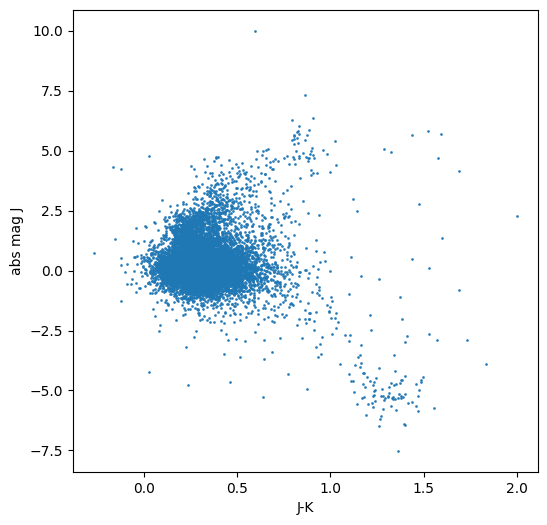

In [36]:
plt.figure(figsize=(6, 6))

plt.scatter(clean_final["J_mag"] - clean_final["K_mag"], clean_final["abs_mag_J"], marker='o', s=1, alpha = 0.85)
plt.xlabel("J-K")
plt.ylabel("abs mag J")
plt.show()

In [37]:
eclipsing = clean_final[(clean_final["ML_classifier_type"] == "EB_ED") | (clean_final["ML_classifier_type"] == "EB_EC") | (clean_final["ML_classifier_type"] == "EB_ESD")]
eclipsing

ASASSN_id  distance  distance_low  distance_high   g_mag  \
26     154619831684       788           780            796  14.048   
70     549756977370       745           733            757  11.637   
73     180388861098       905           884            925  12.140   
76     214748600537       335           334            338   9.829   
80           388378      1023          1008           1042  14.890   
...             ...       ...           ...            ...     ...   
13438  472446488075      1360          1316           1402  14.266   
13441  661427548241      9056          6548          11702  13.181   
13454  661427795036      3175          2747           3576  15.821   
13499  661427750971      6181          5142           7534  14.731   
13503  386547717484      2334          2220           2447  14.494   

                          Gaia_name   G_mag  G_mag_err  abs_mag_G  \
26     Gaia DR3 4685155217893405824  13.727      0.003      4.139   
70     Gaia DR3 2335666854095904896  11.383      0.003      2.022   
73     Gaia DR3 2848533846713833088  11.970      0.003      1.993   
76     Gaia DR3 2798428345921128832   9.775      0.003      2.102   
80      Gaia DR3 431881574626356992  14.291      0.004      3.104   
...                             ...     ...        ...        ...   
13438  Gaia DR3 5957376242442433280  13.854      0.004      2.109   
13441  Gaia DR3 5810645728459427328  13.941      0.006     -1.122   
13454  Gaia DR3 4041122776019086720  15.183      0.005      0.890   
13499  Gaia DR3 4040067760223490176  15.087      0.004     -0.689   
13503  Gaia DR3 4500420462518185088  14.366      0.008      2.234   

       abs_mag_G_low  ...  ext_correct_K_low  ext_correct_K_high  FinalType  \
26             4.162  ...              0.013               0.013   CONSTANT   
70             2.057  ...              0.000               0.000        RRC   
73             2.044  ...              0.025               0.025         EW   
76             2.108  ...              0.006               0.006        RRC   
80             3.136  ...              0.146               0.146         EW   
...              ...  ...                ...                 ...        ...   
13438          2.197  ...              0.136               0.139         EA   
13441         -0.418  ...              0.036               0.036        RRC   
13454          1.307  ...              0.215               0.237       NEED   
13499         -0.286  ...              0.233               0.234       RRAB   
13503          2.343  ...              0.037               0.037         EW   

       ML_classifier_type  visual_classification_type  VSX_type     VSX_RA  \
26                  EB_ED                    constant       RR:    0.97629   
70                  EB_ED                         RRC       RRC    2.61108   
73                  EB_EC                          EW    EC|RRC    2.80154   
76                  EB_ED                         RRC    RRC|EC    2.87817   
80                 EB_ESD                          EW       RRC    3.22345   
...                   ...                         ...       ...        ...   
13438              EB_ESD                          EA       RRC  266.23992   
13441               EB_EC                         RRC       RRC  266.25649   
13454              EB_ESD                        need       RRC  266.37171   
13499               EB_ED                        RRAB      RRAB  266.59492   
13503               EB_EC                          EW       RRC  266.60379   

        VSX_Dec                      VSX_name  J_minus_K  
26    -75.83206                         NSV 8      0.323  
70    -24.96700  ASASSN-V J001026.66-245801.2      0.246  
73     22.23589           ASAS J001113+2214.2      0.230  
76     19.66019           ASAS J001131+1939.6      0.239  
80     64.30151         WISE J001253.6+641805      0.554  
...         ...                           ...        ...  
13438 -41.68089         WISE J174457.5-41

In [38]:
clean_final["distance_high"]

0         4082
1         7076
2         6859
3        12243
4         4440
         ...  
13512    10401
13513     8116
13515     6206
13516     6760
13517    11352
Name: distance_high, Length: 12482, dtype: int64

In [75]:
errors = clean_final[((clean_final["distance_high"] - clean_final["distance_low"]) / clean_final["distance"]) < 0.3].copy()
errors

ASASSN_id  distance  distance_low  distance_high   g_mag  \
0        8590948612      3778          3484           4082  13.245   
4      661428842978      4131          3828           4440  14.566   
7      249108450355      2828          2736           2936  13.397   
8      111669995433      2382          2316           2472  13.186   
11      51540332578      2130          2072           2191  14.293   
...             ...       ...           ...            ...     ...   
13492  609885889380      5495          4815           6213  15.560   
13493  249108326101       676           668            683  11.147   
13503  386547717484      2334          2220           2447  14.494   
13509  214748905668      6505          5809           7689  15.314   
13516   77309496316      6097          5480           6760  14.794   

                          Gaia_name   G_mag  G_mag_err  abs_mag_G  \
0      Gaia DR3 2875539776437822592  12.869      0.012     -0.138   
4      Gaia DR3 2880106185667004928  14.215      0.011      0.796   
7      Gaia DR3 2853512332285518592  13.160      0.010      0.806   
8      Gaia DR3 2880528638650410624  13.047      0.007      0.896   
11      Gaia DR3 422761499325397120  13.595      0.009      0.984   
...                             ...     ...        ...        ...   
13492  Gaia DR3 5918800735916256384  15.197      0.013      1.141   
13493  Gaia DR3 4552669907904983424  10.960      0.003      1.544   
13503  Gaia DR3 4500420462518185088  14.366      0.008      2.234   
13509  Gaia DR3 4493060847076434304  15.099      0.008      0.621   
13516  Gaia DR3 1368903285232020736  14.479      0.015      0.408   

       abs_mag_G_low  ...  ext_correct_K_low  ext_correct_K_high  FinalType  \
0              0.038  ...              0.015               0.015       RRAB   
4              0.961  ...              0.043               0.043       RRAB   
7              0.877  ...              0.012               0.012       RRAB   
8              0.957  ...              0.034               0.034        RRC   
11             1.052  ...              0.123               0.124       RRAB   
...              ...  ...                ...                 ...        ...   
13492          1.428  ...              0.046               0.046       RRAB   
13493          1.570  ...              0.034               0.034       NEED   
13503          2.343  ...              0.037               0.037         EW   
13509          0.866  ...              0.053               0.053        RRC   
13516          0.640  ...              0.019               0.019       RRAB   

       ML_classifier_type  visual_classification_type    VSX_type     VSX_RA  \
0                  RRL_ab                         NaN        RRAB    0.01521   
4                  RRL_ab                         NaN        RRAB    0.09900   
7                  RRL_ab                         NaN        RRAB    0.14829   
8                   RRL_c                         NaN         RRC    0.18471   
11                 RRL_ab                         NaN        RRAB    0.27937   
...                   ...                         ...         ...        ...   
13492              RRL_ab                         NaN          RR  266.55958   
13493              NonVar                        need  EC|RRC|ESD  266.56217   
13503               EB_EC                          EW         RRC  266.60379   
13509               RRL_c                         NaN         RRC  266.62591   
13516              RRL_ab                         NaN        RRAB  266.67642   

        VSX_Dec                      VSX_name  J_minus_K  
0      35.36286                        GM And      0.336  
4      36.32870                  NSVS 6313844      0.399  
7      26.66375                        GV Peg      0.228  
8      37.84283   ROTSE1 J000044.33 +375034.2      0.216  
11     58.55164                        EW Cas      0.435  
...         ...                           ...        ...  
13492 -56.56878  

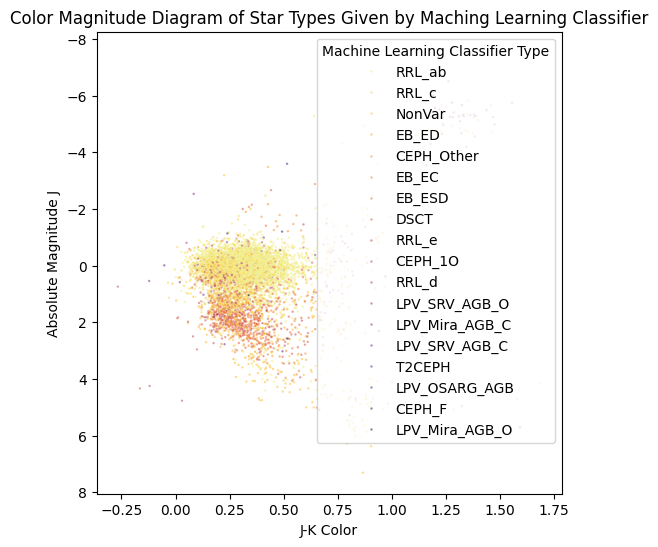

In [76]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x="J_minus_K", y="abs_mag_J", data=errors, hue="ML_classifier_type", alpha=0.5, s=3, palette="inferno_r")
plt.gca().invert_yaxis()
plt.title("Color Magnitude Diagram of Star Types Given by Maching Learning Classifier")
plt.xlabel("J-K Color")
plt.ylabel("Absolute Magnitude J")
plt.legend(title="Machine Learning Classifier Type")

# plt.savefig('test_ml_types.eps', format='eps', dpi=1000)

Text(0, 0.5, 'Absolute Magnitude J')

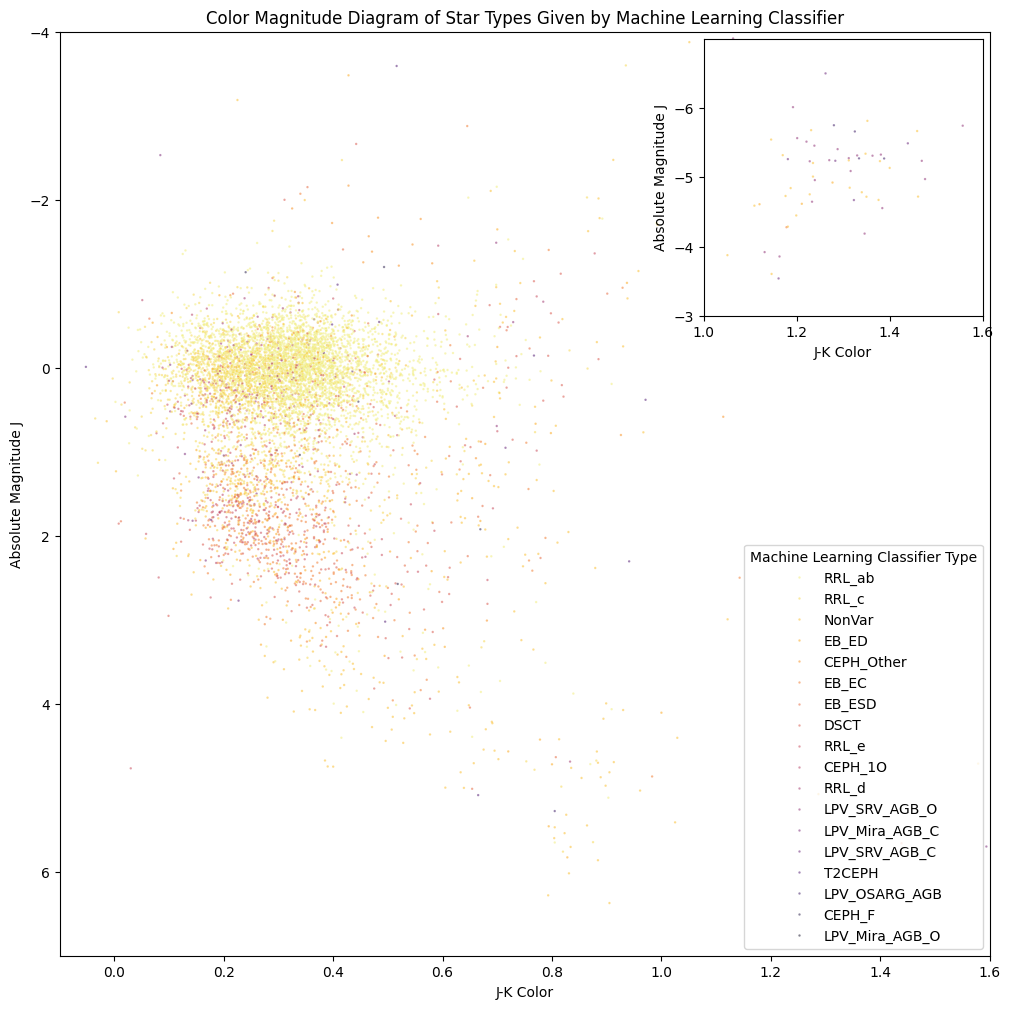

In [41]:
# Main plot
plt.figure(figsize=(12, 12))
scatter_plot = sns.scatterplot(
    x="J_minus_K", 
    y="abs_mag_J", 
    data=errors, 
    hue="ML_classifier_type", 
    alpha=0.5, 
    s=3, 
    palette="inferno_r"
)
plt.gca().invert_yaxis()
plt.title("Color Magnitude Diagram of Star Types Given by Machine Learning Classifier")
plt.xlabel("J-K Color")
plt.ylabel("Absolute Magnitude J")
plt.legend(title="Machine Learning Classifier Type", loc="lower right")
plt.xlim(-0.1, 1.6)
plt.ylim(7, -4)

# Adding an inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Define inset location and size
ax_inset = inset_axes(plt.gca(), width="30%", height="30%", loc="upper right")
sns.scatterplot(
    x="J_minus_K", 
    y="abs_mag_J", 
    data=errors, 
    hue="ML_classifier_type", 
    alpha=0.5, 
    s=3, 
    palette="inferno_r", 
    legend=False, 
    ax=ax_inset
)

# Adjust inset axis limits (zoomed area)
ax_inset.set_xlim(1, 1.6)  # Adjust as needed
ax_inset.set_ylim(-3, -7)      # Adjust as needed
#ax_inset.invert_yaxis()
ax_inset.set_xticks(np.arange(1, 1.6, 0.2))
ax_inset.set_yticks(np.arange(-3, -7, -1)) 
ax_inset.set_xlabel("J-K Color")
ax_inset.set_ylabel("Absolute Magnitude J")

# plt.savefig('inset_ml_types_fig.eps', format='eps', dpi=1000)

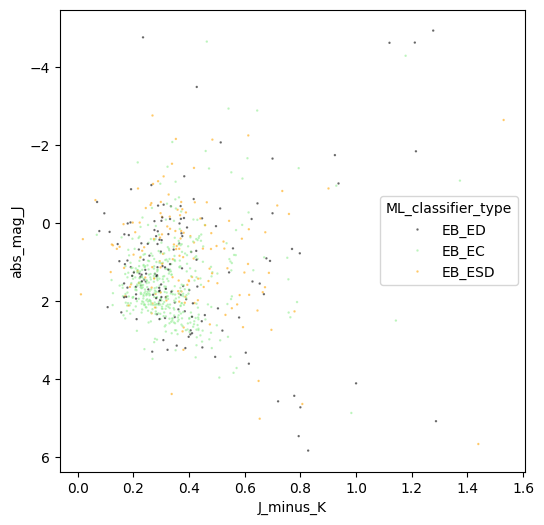

In [77]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x="J_minus_K", y="abs_mag_J", data=eclipsing, hue="ML_classifier_type", alpha=0.6, s=3, palette=["black", "lightgreen", "orange"])
plt.gca().invert_yaxis()
plt.show()

In [78]:
rr_lyrae = errors[(errors["ML_classifier_type"] == "RRL_ab") | (errors["ML_classifier_type"] == "RRL_c") | (errors["ML_classifier_type"] == "RRL_d")]
rr_lyrae

ASASSN_id  distance  distance_low  distance_high   g_mag  \
0        8590948612      3778          3484           4082  13.245   
4      661428842978      4131          3828           4440  14.566   
7      249108450355      2828          2736           2936  13.397   
8      111669995433      2382          2316           2472  13.186   
11      51540332578      2130          2072           2191  14.293   
...             ...       ...           ...            ...     ...   
13484  188979560698      5463          4735           6186  15.414   
13490  403726984661      3571          3243           3906  15.696   
13492  609885889380      5495          4815           6213  15.560   
13509  214748905668      6505          5809           7689  15.314   
13516   77309496316      6097          5480           6760  14.794   

                          Gaia_name   G_mag  G_mag_err  abs_mag_G  \
0      Gaia DR3 2875539776437822592  12.869      0.012     -0.138   
4      Gaia DR3 2880106185667004928  14.215      0.011      0.796   
7      Gaia DR3 2853512332285518592  13.160      0.010      0.806   
8      Gaia DR3 2880528638650410624  13.047      0.007      0.896   
11      Gaia DR3 422761499325397120  13.595      0.009      0.984   
...                             ...     ...        ...        ...   
13484  Gaia DR3 4488253850960909952  15.274      0.010      1.078   
13490  Gaia DR3 4371038421017801344  15.364      0.012      1.849   
13492  Gaia DR3 5918800735916256384  15.197      0.013      1.141   
13509  Gaia DR3 4493060847076434304  15.099      0.008      0.621   
13516  Gaia DR3 1368903285232020736  14.479      0.015      0.408   

       abs_mag_G_low  ...  ext_correct_K_low  ext_correct_K_high  FinalType  \
0              0.038  ...              0.015               0.015       RRAB   
4              0.961  ...              0.043               0.043       RRAB   
7              0.877  ...              0.012               0.012       RRAB   
8              0.957  ...              0.034               0.034        RRC   
11             1.052  ...              0.123               0.124       RRAB   
...              ...  ...                ...                 ...        ...   
13484          1.388  ...              0.065               0.065       RRAB   
13490          2.058  ...              0.096               0.096       RRAB   
13492          1.428  ...              0.046               0.046       RRAB   
13509          0.866  ...              0.053               0.053        RRC   
13516          0.640  ...              0.019               0.019       RRAB   

       ML_classifier_type  visual_classification_type  VSX_type     VSX_RA  \
0                  RRL_ab                         NaN      RRAB    0.01521   
4                  RRL_ab                         NaN      RRAB    0.09900   
7                  RRL_ab                         NaN      RRAB    0.14829   
8                   RRL_c                         NaN       RRC    0.18471   
11                 RRL_ab                         NaN      RRAB    0.27937   
...                   ...                         ...       ...        ...   
13484              RRL_ab                         NaN      RRAB  266.53167   
13490              RRL_ab                         NaN      RRAB  266.55912   
13492              RRL_ab                         NaN        RR  266.55958   
13509               RRL_c                         NaN       RRC  266.62591   
13516              RRL_ab                         NaN      RRAB  266.67642   

        VSX_Dec                      VSX_name  J_minus_K  
0      35.36286                        GM And      0.336  
4      36.32870                  NSVS 6313844      0.399  
7      26.66375                        GV Peg      0.228  
8      37.84283   ROTSE1 J000044.33 +375034.2      0.216  
11     58.55164                        EW Cas      0.435  
...         ...                           ...        ...  
13484   8.82417                     V1072

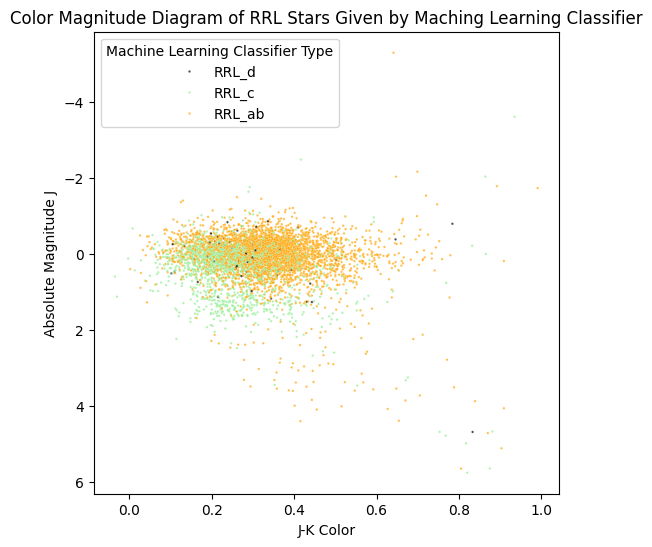

In [79]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x="J_minus_K", y="abs_mag_J", data=rr_lyrae, hue="ML_classifier_type", hue_order=["RRL_d", "RRL_c", "RRL_ab"], alpha=0.7, palette=["black", "lightgreen", "orange"], s=3)
plt.gca().invert_yaxis()

plt.title("Color Magnitude Diagram of RRL Stars Given by Maching Learning Classifier")
plt.xlabel("J-K Color")
plt.ylabel("Absolute Magnitude J")
plt.legend(title="Machine Learning Classifier Type")

# plt.savefig('rrl.eps', format='eps', dpi=1000)

In [80]:
rr_lyrae_ab = rr_lyrae[rr_lyrae["ML_classifier_type"] == "RRL_ab"]

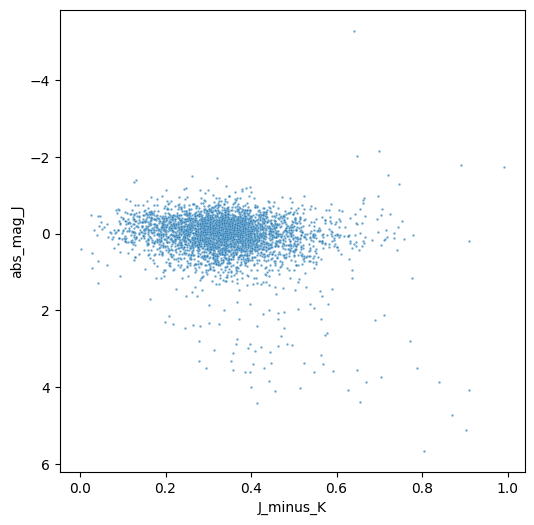

In [81]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x="J_minus_K", y="abs_mag_J", data=rr_lyrae_ab, alpha=0.7, s=3)
plt.gca().invert_yaxis()
plt.show()
# plt.savefig('test_eps_plot.eps', format='eps') 

In [82]:
rr_lyrae_c = rr_lyrae[rr_lyrae["ML_classifier_type"] == "RRL_c"]

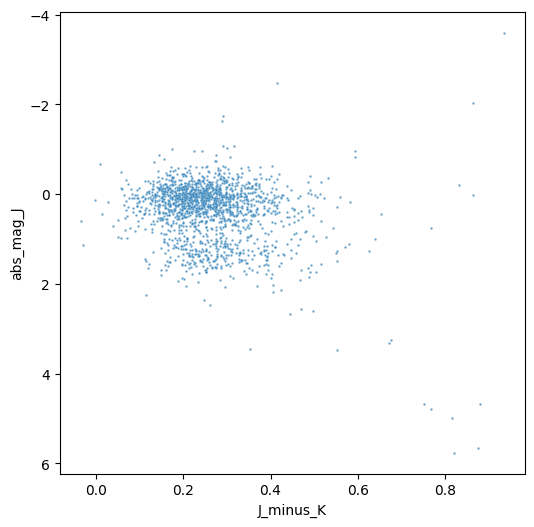

In [83]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x="J_minus_K", y="abs_mag_J", data=rr_lyrae_c, alpha=0.7, s=3)
plt.gca().invert_yaxis()
plt.show()
# plt.savefig('test_eps_plot.eps', format='eps') 

In [84]:
rr_lyrae_d = rr_lyrae[rr_lyrae["ML_classifier_type"] == "RRL_d"]

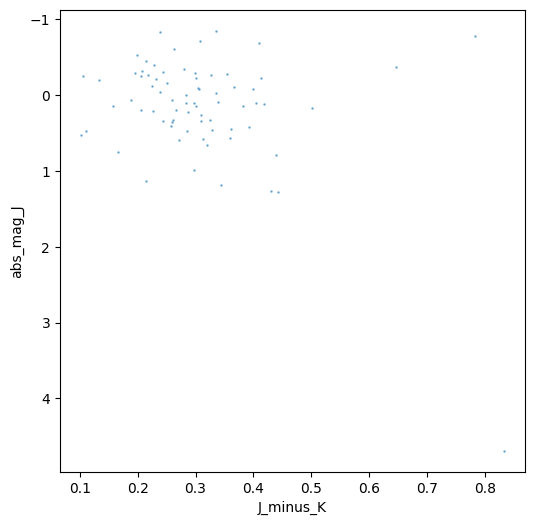

In [85]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x="J_minus_K", y="abs_mag_J", data=rr_lyrae_d, alpha=0.7, s=3)
plt.gca().invert_yaxis()
plt.show()
# plt.savefig('test_eps_plot.eps', format='eps') 

In [86]:
clean_final["visual_classification_type"].unique()

array([nan, 'RRC', 'constant', 'RRab', 'possibly', "I'd", 'EB', 'EW',
       'RR(B)', 'RRAB', 'BY', 'EA', 'SRA', 'const', 'SXPHE', 'RS', 'L',
       'SRB', 'need', 'GDOR:', 'DSCT', 'BY:', 'INS', 'GDOR', 'CEP:', 'SR',
       'SRD', 'no', 'DCEP', 'CWA:', 'CEP'], dtype=object)

In [87]:
clean_final_rr = clean_final[(clean_final["visual_classification_type"] == "RRAB") | (clean_final["visual_classification_type"] == "RRab") | (clean_final["visual_classification_type"] == "RRC") | (clean_final["visual_classification_type"] == "RR(B)") | (clean_final["visual_classification_type"] == "RRC/EW") | (clean_final["visual_classification_type"] == "RRAB/CWB") | (clean_final["visual_classification_type"] == "RRd") | (clean_final["visual_classification_type"] == "RRC/EW?") | (clean_final["visual_classification_type"] == "RRC?")]
len(clean_final_rr)

704

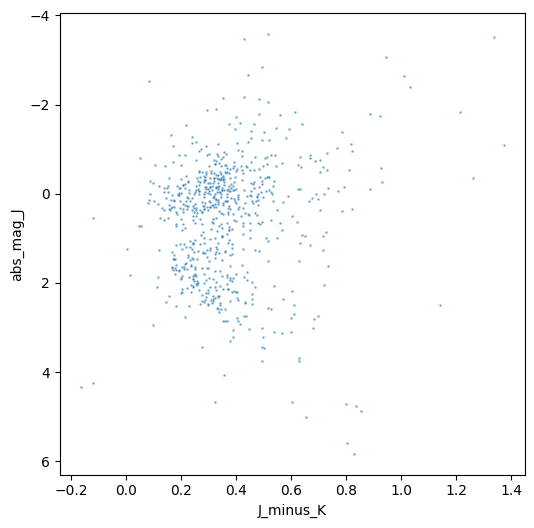

In [88]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x="J_minus_K", y="abs_mag_J", data=clean_final_rr, alpha=0.7, s=3)
plt.gca().invert_yaxis()
plt.show()
# plt.savefig('test_eps_plot.eps', format='eps') 

In [89]:
rr_lyrae.groupby("ML_classifier_type").agg("count").reset_index()

ML_classifier_type  ASASSN_id  distance  distance_low  distance_high  g_mag  \
0             RRL_ab       3797      3797          3797           3797   3797   
1              RRL_c       1694      1694          1694           1694   1694   
2              RRL_d         73        73            73             73     73   

   Gaia_name  G_mag  G_mag_err  abs_mag_G  ...  ext_correct_K  \
0       3797   3797       3797       3797  ...           3797   
1       1694   1694       1694       1694  ...           1694   
2         73     73         73         73  ...             73   

   ext_correct_K_low  ext_correct_K_high  FinalType  \
0               3797                3797       3797   
1               1694                1694       1694   
2                 73                  73         73   

   visual_classification_type  VSX_type  VSX_RA  VSX_Dec  VSX_name  J_minus_K  
0                           0      3797    3797     3797      3797       3797  
1                           0      1694    1694     1694      1694       1694  
2                           0        73      73       73        73         73  

[3 rows x 39 columns]

In [90]:
clean_final.groupby("ML_classifier_type").agg("count").reset_index()

ML_classifier_type  ASASSN_id  distance  distance_low  distance_high  \
0             CEPH_1O        107       107           107            107   
1              CEPH_F         22        22            22             22   
2          CEPH_Other         78        78            78             78   
3                DSCT        219       219           219            219   
4               EB_EC        451       451           451            451   
5               EB_ED        156       156           156            156   
6              EB_ESD        143       143           143            143   
7      LPV_Mira_AGB_C         19        19            19             19   
8      LPV_Mira_AGB_O          2         2             2              2   
9       LPV_OSARG_AGB          6         6             6              6   
10      LPV_SRV_AGB_C         11        11            11             11   
11      LPV_SRV_AGB_O         35        35            35             35   
12             NonVar        693       693           693            693   
13             RRL_ab       7353      7353          7353           7353   
14              RRL_c       2614      2614          2614           2614   
15              RRL_d        157       157           157            157   
16              RRL_e        391       391           391            391   
17             T2CEPH         25        25            25             25   

    g_mag  Gaia_name  G_mag  G_mag_err  abs_mag_G  ...  ext_correct_K  \
0     107        107    107        107        107  ...            107   
1      22         22     22         22         22  ...             22   
2      78         78     78         78         78  ...             78   
3     219        219    219        219        219  ...            219   
4     451        451    451        451        451  ...            451   
5     156        156    156        156        156  ...            156   
6     143        143    143        143        143  ...            143   
7      19         19     19         19         19  ...             19   
8       2          2      2          2          2  ...              2   
9       6          6      6          6          6  ...              6   
10     11         11     11         11         11  ...             11   
11     35         35     35         35         35  ...             35   
12    693        693    693        693        693  ...            693   
13   7353       7353   7353       7353       7353  ...           7353   
14   2614       2614   2614       2614       2614  ...           2614   
15    157        157    157        157        157  ...            157   
16    391        391    391        391        391  ...            391   
17     25         25     25         25         25  ...             25   

    ext_correct_K_low  ext_correct_K_high  FinalType  \
0                 107                 107        107   
1                  22                  22         22   
2                  78                  78         78   
3                 219                 219        219   
4                 451                 451        451   
5                 156                 156        156   
6                 143                 143        143   
7                  19                  19         19   
8                   2                   2          2   
9                   6                   6          6   
10                 11                  11         11   
11                 35                  35         35   
12                693                 693        693   
13               7353                7353       7353   
14               2614                2614       2614   
15                157                 157        157   
16                391                 391        391   
17                 25                  25         25   

    visual_classification_type  VSX_type  VSX_RA  VSX_Dec  VSX_name  J_minus_K  
0                          107       107   

In [91]:
eclipsing.groupby("ML_classifier_type").agg("count").reset_index()

ML_classifier_type  ASASSN_id  distance  distance_low  distance_high  g_mag  \
0              EB_EC        451       451           451            451    451   
1              EB_ED        156       156           156            156    156   
2             EB_ESD        143       143           143            143    143   

   Gaia_name  G_mag  G_mag_err  abs_mag_G  ...  ext_correct_K  \
0        451    451        451        451  ...            451   
1        156    156        156        156  ...            156   
2        143    143        143        143  ...            143   

   ext_correct_K_low  ext_correct_K_high  FinalType  \
0                451                 451        451   
1                156                 156        156   
2                143                 143        143   

   visual_classification_type  VSX_type  VSX_RA  VSX_Dec  VSX_name  J_minus_K  
0                         451       451     451      451       451        451  
1                         156       156     156      156       156        156  
2                         143       143     143      143       143        143  

[3 rows x 39 columns]

In [92]:
errors.groupby("FinalType").agg("count").reset_index()

FinalType  ASASSN_id  distance  distance_low  distance_high  g_mag  \
0         BY         18        18            18             18     18   
1        BY:          1         1             1              1      1   
2        CEP          3         3             3              3      3   
3      CONST          3         3             3              3      3   
4   CONSTANT        109       109           109            109    109   
5       CWA:          1         1             1              1      1   
6       DCEP          2         2             2              2      2   
7       DSCT         23        23            23             23     23   
8         EA         54        54            54             54     54   
9         EB         49        49            49             49     49   
10        EW        483       483           483            483    483   
11      GDOR          1         1             1              1      1   
12     GDOR:          2         2             2              2      2   
13       I'D          1         1             1              1      1   
14       INS          1         1             1              1      1   
15         L         17        17            17             17     17   
16      NEED        232       232           232            232    232   
17        NO          3         3             3              3      3   
18  POSSIBLY          1         1             1              1      1   
19     RR(B)         82        82            82             82     82   
20      RRAB       3986      3986          3986           3986   3986   
21       RRC       2310      2310          2310           2310   2310   
22        RS         11        11            11             11     11   
23        SR         40        40            40             40     40   
24       SRA          3         3             3              3      3   
25       SRB          1         1             1              1      1   
26       SRD          1         1             1              1      1   
27     SXPHE          1         1             1              1      1   

    Gaia_name  G_mag  G_mag_err  abs_mag_G  ...  ext_correct_K  \
0          18     18         18         18  ...             18   
1           1      1          1          1  ...              1   
2           3      3          3          3  ...              3   
3           3      3          3          3  ...              3   
4         109    109        109        109  ...            109   
5           1      1          1          1  ...              1   
6           2      2          2          2  ...              2   
7          23     23         23         23  ...             23   
8          54     54         54         54  ...             54   
9          49     49         49         49  ...             49   
10        483    483        483        483  ...            483   
11          1      1          1          1  ...              1   
12          2      2          2          2  ...              2   
13          1      1          1          1  ...              1   
14          1      1          1          1  ...              1   
15         17     17         17         17  ...             17   
16        232    232        232        232  ...            232   
17          3      3          3          3  ...              3   
18          1      1          1          1  ...              1   
19         82     82         82         82  ...             82   
20       3986   3986       3986       3986  ...           3986   
21       2310   2310       2310       2310  ...           2310   
22         11     11         11         11  ...             11   
23         40     40         40         40  ...             40   
24          3      3          3          3  ...              3   
25          1      1          1          1  ...              1   
26          1      1          1          1  ...              1   
27          1      1          1      

In [93]:
rr_lyrae_final = errors[(errors["FinalType"] == "RRAB") | (errors["FinalType"] == "RRC") | (errors["FinalType"] == "RR(B)")]
rr_lyrae_final

ASASSN_id  distance  distance_low  distance_high   g_mag  \
0        8590948612      3778          3484           4082  13.245   
4      661428842978      4131          3828           4440  14.566   
7      249108450355      2828          2736           2936  13.397   
8      111669995433      2382          2316           2472  13.186   
11      51540332578      2130          2072           2191  14.293   
...             ...       ...           ...            ...     ...   
13484  188979560698      5463          4735           6186  15.414   
13490  403726984661      3571          3243           3906  15.696   
13492  609885889380      5495          4815           6213  15.560   
13509  214748905668      6505          5809           7689  15.314   
13516   77309496316      6097          5480           6760  14.794   

                          Gaia_name   G_mag  G_mag_err  abs_mag_G  \
0      Gaia DR3 2875539776437822592  12.869      0.012     -0.138   
4      Gaia DR3 2880106185667004928  14.215      0.011      0.796   
7      Gaia DR3 2853512332285518592  13.160      0.010      0.806   
8      Gaia DR3 2880528638650410624  13.047      0.007      0.896   
11      Gaia DR3 422761499325397120  13.595      0.009      0.984   
...                             ...     ...        ...        ...   
13484  Gaia DR3 4488253850960909952  15.274      0.010      1.078   
13490  Gaia DR3 4371038421017801344  15.364      0.012      1.849   
13492  Gaia DR3 5918800735916256384  15.197      0.013      1.141   
13509  Gaia DR3 4493060847076434304  15.099      0.008      0.621   
13516  Gaia DR3 1368903285232020736  14.479      0.015      0.408   

       abs_mag_G_low  ...  ext_correct_K_low  ext_correct_K_high  FinalType  \
0              0.038  ...              0.015               0.015       RRAB   
4              0.961  ...              0.043               0.043       RRAB   
7              0.877  ...              0.012               0.012       RRAB   
8              0.957  ...              0.034               0.034        RRC   
11             1.052  ...              0.123               0.124       RRAB   
...              ...  ...                ...                 ...        ...   
13484          1.388  ...              0.065               0.065       RRAB   
13490          2.058  ...              0.096               0.096       RRAB   
13492          1.428  ...              0.046               0.046       RRAB   
13509          0.866  ...              0.053               0.053        RRC   
13516          0.640  ...              0.019               0.019       RRAB   

       ML_classifier_type  visual_classification_type  VSX_type     VSX_RA  \
0                  RRL_ab                         NaN      RRAB    0.01521   
4                  RRL_ab                         NaN      RRAB    0.09900   
7                  RRL_ab                         NaN      RRAB    0.14829   
8                   RRL_c                         NaN       RRC    0.18471   
11                 RRL_ab                         NaN      RRAB    0.27937   
...                   ...                         ...       ...        ...   
13484              RRL_ab                         NaN      RRAB  266.53167   
13490              RRL_ab                         NaN      RRAB  266.55912   
13492              RRL_ab                         NaN        RR  266.55958   
13509               RRL_c                         NaN       RRC  266.62591   
13516              RRL_ab                         NaN      RRAB  266.67642   

        VSX_Dec                      VSX_name  J_minus_K  
0      35.36286                        GM And      0.336  
4      36.32870                  NSVS 6313844      0.399  
7      26.66375                        GV Peg      0.228  
8      37.84283   ROTSE1 J000044.33 +375034.2      0.216  
11     58.55164                        EW Cas      0.435  
...         ...                           ...        ...  
13484   8.82417                     V1072

In [94]:
final_data = errors[(errors["FinalType"] == "RRAB") | (errors["FinalType"] == "RRC") | (errors["FinalType"] == "RR(B)") |  (errors["FinalType"] == "EW") | (errors["FinalType"] == "DSCT") | (errors["FinalType"] == "SXPHE")] 

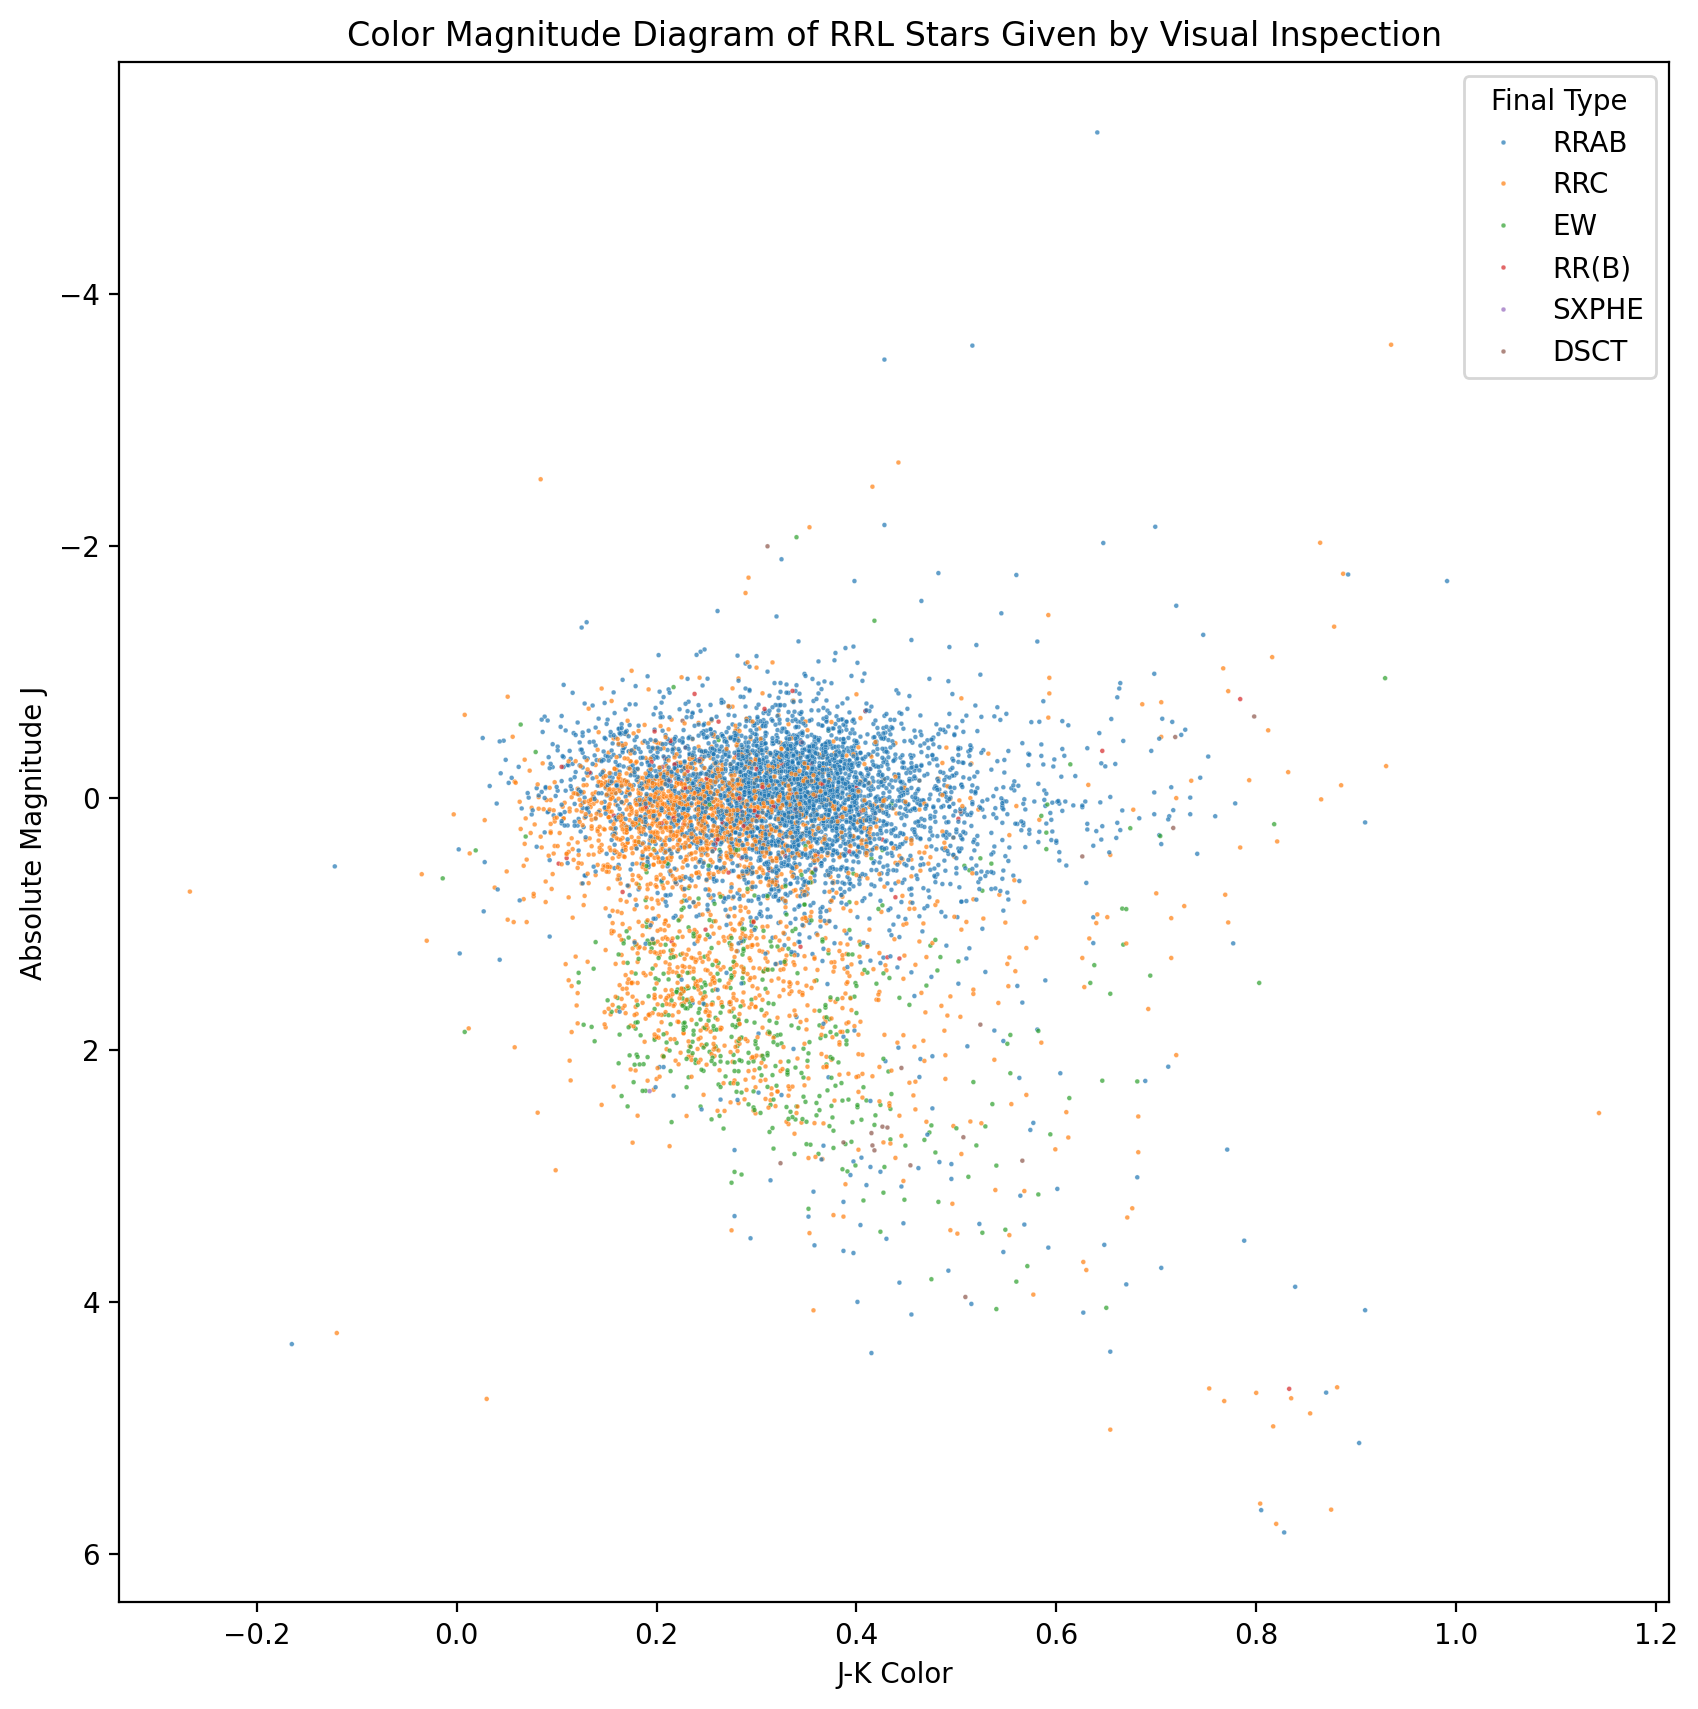

In [95]:
plt.figure(figsize=(10, 10), dpi = 200)
sns.scatterplot(x="J_minus_K", y="abs_mag_J", data=final_data, hue="FinalType", alpha=0.7, s=3)
plt.gca().invert_yaxis()

plt.title("Color Magnitude Diagram of RRL Stars Given by Visual Inspection")
plt.xlabel("J-K Color")
plt.ylabel("Absolute Magnitude J")
plt.legend(title="Final Type")

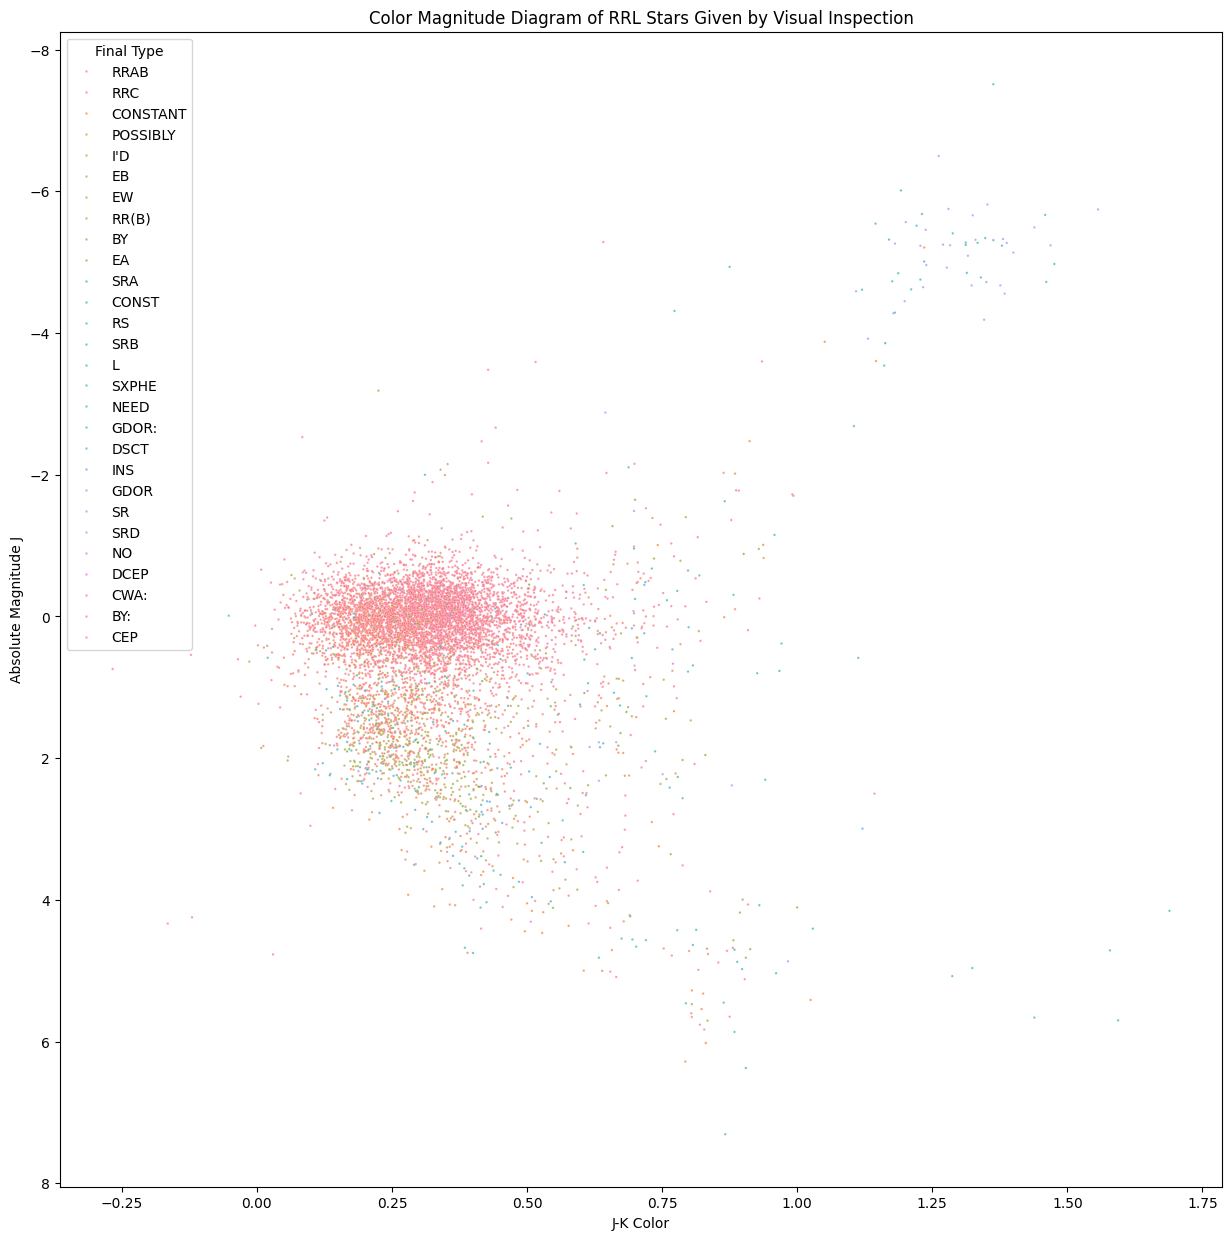

In [96]:
plt.figure(figsize=(15, 15))
sns.scatterplot(x="J_minus_K", y="abs_mag_J", data=errors, hue="FinalType", alpha=0.7, s=3)
plt.gca().invert_yaxis()

plt.title("Color Magnitude Diagram of RRL Stars Given by Visual Inspection")
plt.xlabel("J-K Color")
plt.ylabel("Absolute Magnitude J")
plt.legend(title="Final Type")

In [97]:
errors["ext_correct_J"].mean()

np.float64(0.11560492001613122)

In [98]:
errors["ext_correct_K"].mean()

np.float64(0.049532598467535965)

In [99]:
# Error calculations
errors['J-K'] = errors['J_mag'] - errors['K_mag']
errors['J-K_err'] = np.sqrt(errors['J_mag_err']**2 + errors['K_mag_err']**2)

In [100]:
# Distance uncertainty calculation
errors['sigma_distance'] = (errors['distance_high'] - errors['distance_low']) / 2
errors['sigma_dist_term'] = (5/np.log(10)) * (errors['sigma_distance']/errors['distance'])

In [101]:
# Calculate E(B-V) using extinction corrections
R_J = 0.91  # From Yuan et al. 2013
R_K = 0.39

# Derive E(B-V) from extinction corrections
errors['E(B-V)'] = errors['ext_correct_J'] / R_J  # A_J = R_J * E(B-V) => E(B-V) = A_J/R_J

# Now calculate A_J and E(J-K) safely
errors['A_J'] = R_J * errors['E(B-V)']
errors['E(J-K)'] = (R_J - R_K) * errors['E(B-V)']

In [102]:
# Absolute magnitude calculation with error propagation
errors['abs_mag_J'] = (errors['J_mag'] 
                      - 5 * np.log10(errors['distance']) 
                      + 5 
                      - errors['A_J'])
errors['abs_mag_J_err'] = np.sqrt(
    errors['J_mag_err']**2 + 
    errors['sigma_dist_term']**2 + 
    (R_J * 0.1 * errors['E(B-V)'])**2  # Assuming 10% error in E(B-V)
)

In [103]:
# Quality cuts
filtered = errors[
    (errors['J-K_err'] < 0.05) &
    (errors['abs_mag_J_err'] < 0.15) &
    (errors['E(J-K)'] < 0.1) &
    (errors['A_J'] < 1.5)
]

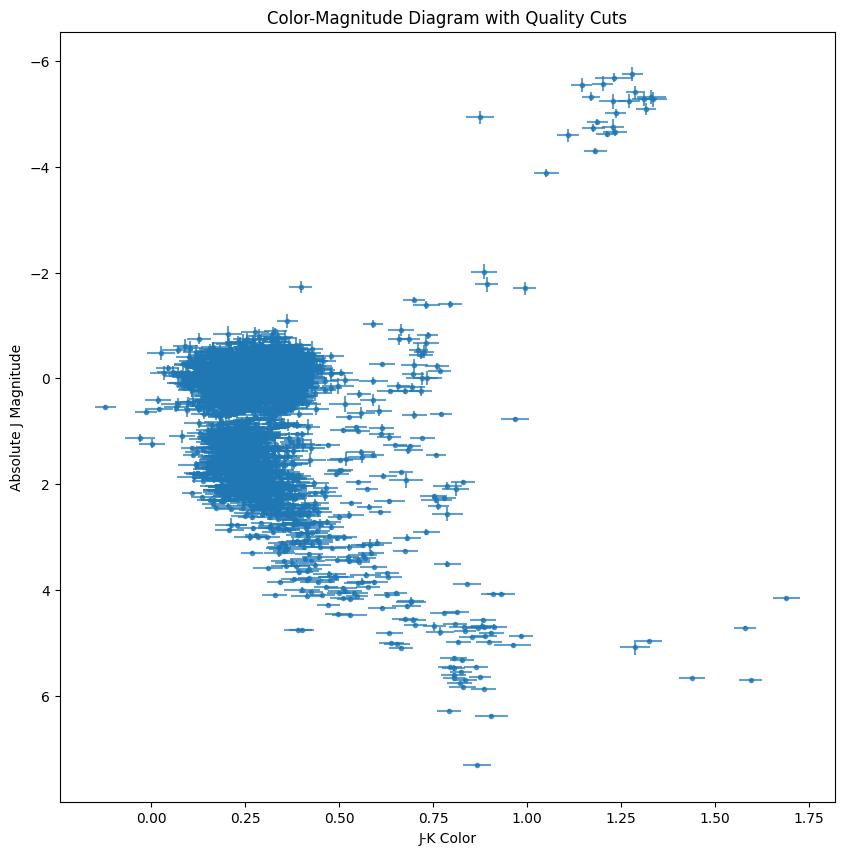

In [104]:
# Plotting
plt.figure(figsize=(10, 10))
plt.errorbar(x = filtered['J-K'], y = filtered['abs_mag_J'], xerr=filtered['J-K_err'], yerr=filtered['abs_mag_J_err'], fmt='o', markersize=3, alpha=0.7)
plt.gca().invert_yaxis()
plt.xlabel('J-K Color')
plt.ylabel('Absolute J Magnitude')
plt.title('Color-Magnitude Diagram with Quality Cuts')
plt.show()

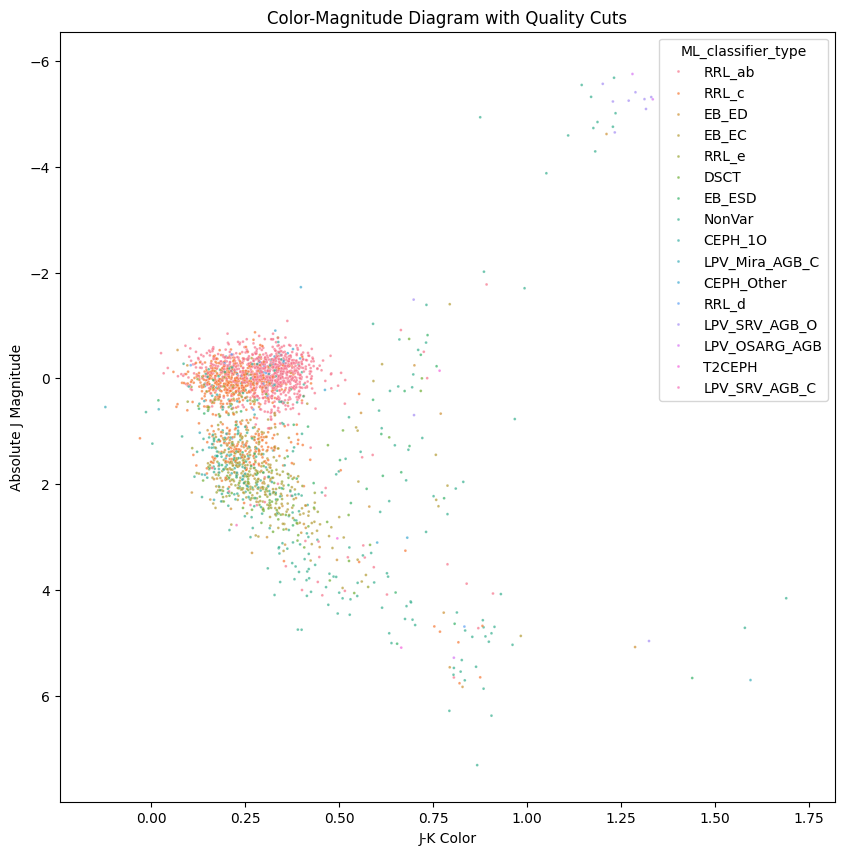

In [105]:
# Plotting
plt.figure(figsize=(10, 10))
plt.errorbar(
    x=filtered['J-K'], 
    y=filtered['abs_mag_J'], 
    xerr=filtered['J-K_err'], 
    yerr=filtered['abs_mag_J_err'], 
    fmt='none', 
    ecolor='gray', 
    alpha=0
)
sns.scatterplot(
    data=filtered,
    x='J-K',
    y='abs_mag_J',
    hue='ML_classifier_type',
    s=4,
    alpha=0.7,
)
plt.gca().invert_yaxis()
plt.xlabel('J-K Color')
plt.ylabel('Absolute J Magnitude')
plt.title('Color-Magnitude Diagram with Quality Cuts')
plt.show()


In [106]:
errors

ASASSN_id  distance  distance_low  distance_high   g_mag  \
0        8590948612      3778          3484           4082  13.245   
4      661428842978      4131          3828           4440  14.566   
7      249108450355      2828          2736           2936  13.397   
8      111669995433      2382          2316           2472  13.186   
11      51540332578      2130          2072           2191  14.293   
...             ...       ...           ...            ...     ...   
13492  609885889380      5495          4815           6213  15.560   
13493  249108326101       676           668            683  11.147   
13503  386547717484      2334          2220           2447  14.494   
13509  214748905668      6505          5809           7689  15.314   
13516   77309496316      6097          5480           6760  14.794   

                          Gaia_name   G_mag  G_mag_err  abs_mag_G  \
0      Gaia DR3 2875539776437822592  12.869      0.012     -0.138   
4      Gaia DR3 2880106185667004928  14.215      0.011      0.796   
7      Gaia DR3 2853512332285518592  13.160      0.010      0.806   
8      Gaia DR3 2880528638650410624  13.047      0.007      0.896   
11      Gaia DR3 422761499325397120  13.595      0.009      0.984   
...                             ...     ...        ...        ...   
13492  Gaia DR3 5918800735916256384  15.197      0.013      1.141   
13493  Gaia DR3 4552669907904983424  10.960      0.003      1.544   
13503  Gaia DR3 4500420462518185088  14.366      0.008      2.234   
13509  Gaia DR3 4493060847076434304  15.099      0.008      0.621   
13516  Gaia DR3 1368903285232020736  14.479      0.015      0.408   

       abs_mag_G_low  ...                      VSX_name  J_minus_K    J-K  \
0              0.038  ...                        GM And      0.336  0.336   
4              0.961  ...                  NSVS 6313844      0.399  0.399   
7              0.877  ...                        GV Peg      0.228  0.228   
8              0.957  ...   ROTSE1 J000044.33 +375034.2      0.216  0.216   
11             1.052  ...                        EW Cas      0.435  0.435   
...              ...  ...                           ...        ...    ...   
13492          1.428  ...                        OS Ara      0.352  0.352   
13493          1.570  ...           ASAS J174615+2006.4      0.255  0.255   
13503          2.343  ...          CSS_J174624.9+142748      0.215  0.215   
13509          0.866  ...  ASASSN-V J174630.22+114608.2      0.251  0.251   
13516          0.640  ...          CSS_J174642.2+524530      0.274  0.274   

        J-K_err  sigma_distance  sigma_dist_term    E(B-V)    A_J    E(J-K)  \
0      0.031828           299.0         0.171856  0.039560  0.036  0.020571   
4      0.041110           306.0         0.160850  0.110989  0.101  0.057714   
7      0.030414           100.0         0.076785  0.031868  0.029  0.016571   
8      0.031145            78.0         0.071106  0.087912  0.080  0.045714   
11     0.033601            59.5         0.060659  0.317582  0.289  0.165143   
...         ...             ...              ...       ...    ...       ...   
13492  0.068352           699.0         0.276226  0.116484  0.106  0.060571   
13493  0.029069             7.5         0.024092  0.087912  0.080  0.045714   
13503  0.036620           113.5         0.105596  0.095604  0.087  0.049714   
13509  0.060415           940.0         0.313787  0.135165  0.123  0.070286   
13516  0.052697           640.0         0.227939  0.047253  0.043  0.024571   

       abs_mag_J_err  
0           0.173295  
4           0.164121  
7           0.079927  
8           0.075160  
11          0.072413  
...              ...  
13492       0.277469  
13493       0.033592  
13503       0.108015  
13509       0.315364  
13516       0.229816  

[7439 rows x 47 columns]

In [107]:
rrl_ab = filtered[filtered["ML_classifier_type"] == "RRL_ab"]
rrl_c = filtered[filtered["ML_classifier_type"] == "RRL_c"]
nonvar = filtered[filtered["ML_classifier_type"] == "NonVar"]
eb_ec = filtered[filtered["ML_classifier_type"] == "EB_EC"]
rrl_e = filtered[filtered["ML_classifier_type"] == "RRL_e"]
dsct = filtered[filtered["ML_classifier_type"] == "DSCT"]
eb_ed = filtered[filtered["ML_classifier_type"] == "EB_ED"]
eb_esd = filtered[filtered["ML_classifier_type"] == "EB_ESD"]
rrl_d = filtered[filtered["ML_classifier_type"] == "RRL_d"]

/var/folders/kv/b7ycyzg17v3f_grsjzhtpwt80000gn/T/ipykernel_88142/4142491993.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(title=f"{len(rrl_ab)} Stars")
/var/folders/kv/b7ycyzg17v3f_grsjzhtpwt80000gn/T/ipykernel_88142/4142491993.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(title=f"{len(rrl_c)} Stars")
/var/folders/kv/b7ycyzg17v3f_grsjzhtpwt80000gn/T/ipykernel_88142/4142491993.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax3.legend(title=f"{len(nonvar)} Stars")
/var/folders/kv/b7ycyzg17v3f_grsjzhtpwt80000gn/T/ipykernel_88142/4142491993.py:40: UserWarning: No artists with l

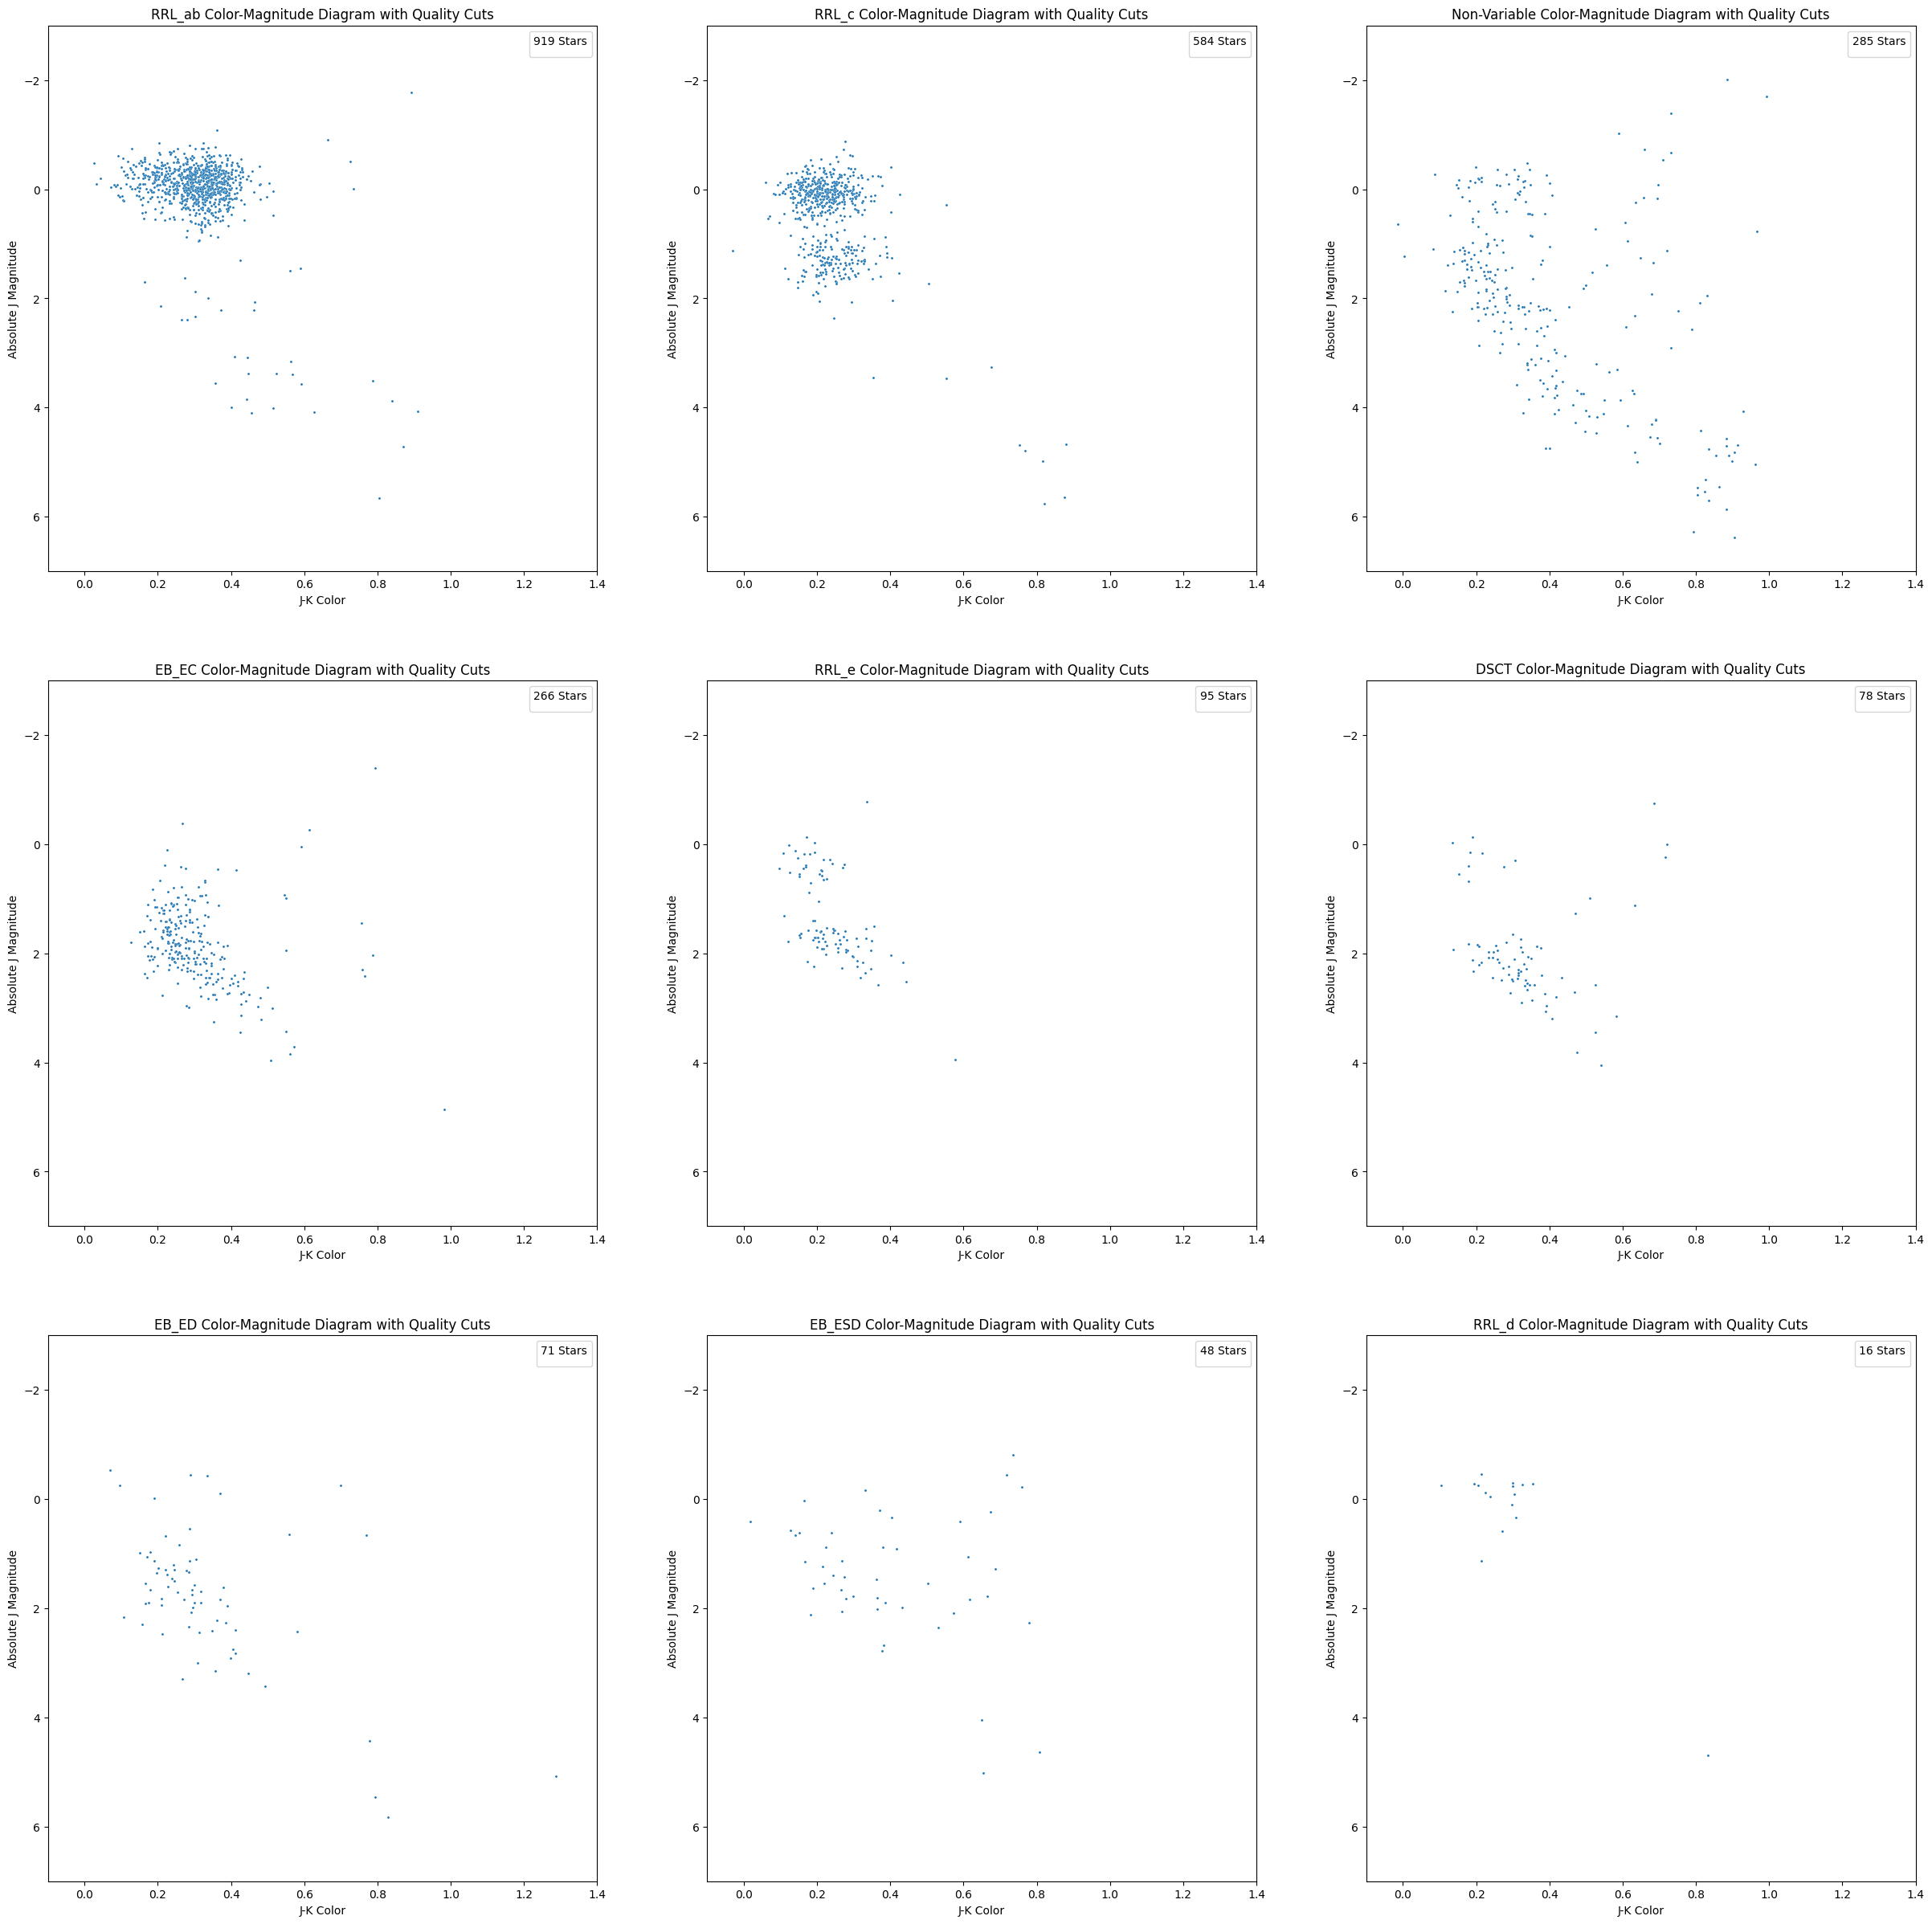

In [108]:
# Plotting
fig = plt.figure(figsize=(30, 30))

ax1 = fig.add_subplot(331)
sns.scatterplot(data=rrl_ab, x='J-K', y='abs_mag_J', s=5)
ax1.invert_yaxis()
ax1.set_xlabel('J-K Color')
ax1.set_ylabel('Absolute J Magnitude')
ax1.set_title('RRL_ab Color-Magnitude Diagram with Quality Cuts')
ax1.legend(title=f"{len(rrl_ab)} Stars")
ax1.set_xlim(-0.1, 1.4)
ax1.set_ylim(7, -3)

ax2 = fig.add_subplot(332)
sns.scatterplot(data=rrl_c, x='J-K', y='abs_mag_J', s=5)
ax2.invert_yaxis()
ax2.set_xlabel('J-K Color')
ax2.set_ylabel('Absolute J Magnitude')
ax2.set_title('RRL_c Color-Magnitude Diagram with Quality Cuts')
ax2.legend(title=f"{len(rrl_c)} Stars")
ax2.set_xlim(-0.1, 1.4)
ax2.set_ylim(7, -3)

ax3 = fig.add_subplot(333)
sns.scatterplot(data=nonvar, x='J-K', y='abs_mag_J', s=5)
ax3.invert_yaxis()
ax3.set_xlabel('J-K Color')
ax3.set_ylabel('Absolute J Magnitude')
ax3.set_title('Non-Variable Color-Magnitude Diagram with Quality Cuts')
ax3.legend(title=f"{len(nonvar)} Stars")
ax3.set_xlim(-0.1, 1.4)
ax3.set_ylim(7, -3)

ax4 = fig.add_subplot(334)
sns.scatterplot(data=eb_ec, x='J-K', y='abs_mag_J', s=5)
ax4.invert_yaxis()
ax4.set_xlabel('J-K Color')
ax4.set_ylabel('Absolute J Magnitude')
ax4.set_title('EB_EC Color-Magnitude Diagram with Quality Cuts')
ax4.legend(title=f"{len(eb_ec)} Stars")
ax4.set_xlim(-0.1, 1.4)
ax4.set_ylim(7, -3)

ax5 = fig.add_subplot(335)
sns.scatterplot(data=rrl_e, x='J-K', y='abs_mag_J', s=5)
ax5.invert_yaxis()
ax5.set_xlabel('J-K Color')
ax5.set_ylabel('Absolute J Magnitude')
ax5.set_title('RRL_e Color-Magnitude Diagram with Quality Cuts')
ax5.legend(title=f"{len(rrl_e)} Stars")
ax5.set_xlim(-0.1, 1.4)
ax5.set_ylim(7, -3)

ax6 = fig.add_subplot(336)
sns.scatterplot(data=dsct, x='J-K', y='abs_mag_J', s=5)
ax6.invert_yaxis()
ax6.set_xlabel('J-K Color')
ax6.set_ylabel('Absolute J Magnitude')
ax6.set_title('DSCT Color-Magnitude Diagram with Quality Cuts')
ax6.legend(title=f"{len(dsct)} Stars")
ax6.set_xlim(-0.1, 1.4)
ax6.set_ylim(7, -3)

ax7 = fig.add_subplot(337)
sns.scatterplot(data=eb_ed, x='J-K', y='abs_mag_J', s=5)
ax7.invert_yaxis()
ax7.set_xlabel('J-K Color')
ax7.set_ylabel('Absolute J Magnitude')
ax7.set_title('EB_ED Color-Magnitude Diagram with Quality Cuts')
ax7.legend(title=f"{len(eb_ed)} Stars")
ax7.set_xlim(-0.1, 1.4)
ax7.set_ylim(7, -3)

ax8 = fig.add_subplot(338)
sns.scatterplot(data=eb_esd, x='J-K', y='abs_mag_J', s=5)
ax8.invert_yaxis()
ax8.set_xlabel('J-K Color')
ax8.set_ylabel('Absolute J Magnitude')
ax8.set_title('EB_ESD Color-Magnitude Diagram with Quality Cuts')
ax8.legend(title=f"{len(eb_esd)} Stars")
ax8.set_xlim(-0.1, 1.4)
ax8.set_ylim(7, -3)

ax9 = fig.add_subplot(339)
sns.scatterplot(data=rrl_d, x='J-K', y='abs_mag_J', s=5)
ax9.invert_yaxis()
ax9.set_xlabel('J-K Color')
ax9.set_ylabel('Absolute J Magnitude')
ax9.set_title('RRL_d Color-Magnitude Diagram with Quality Cuts')
ax9.legend(title=f"{len(rrl_d)} Stars")
ax9.set_xlim(-0.1, 1.4)
ax9.set_ylim(7, -3)

plt.show()

In [109]:
filtered.groupby("ML_classifier_type").agg("count").reset_index().sort_values(by="ASASSN_id", ascending=False)

ML_classifier_type  ASASSN_id  distance  distance_low  distance_high  \
11             RRL_ab        919       919           919            919   
12              RRL_c        584       584           584            584   
10             NonVar        285       285           285            285   
3               EB_EC        266       266           266            266   
14              RRL_e         95        95            95             95   
2                DSCT         78        78            78             78   
4               EB_ED         71        71            71             71   
0             CEPH_1O         60        60            60             60   
5              EB_ESD         48        48            48             48   
1          CEPH_Other         19        19            19             19   
6      LPV_Mira_AGB_C         17        17            17             17   
13              RRL_d         16        16            16             16   
9       LPV_SRV_AGB_O         11        11            11             11   
7       LPV_OSARG_AGB          3         3             3              3   
15             T2CEPH          3         3             3              3   
8       LPV_SRV_AGB_C          1         1             1              1   

    g_mag  Gaia_name  G_mag  G_mag_err  abs_mag_G  ...  VSX_name  J_minus_K  \
11    919        919    919        919        919  ...       919        919   
12    584        584    584        584        584  ...       584        584   
10    285        285    285        285        285  ...       285        285   
3     266        266    266        266        266  ...       266        266   
14     95         95     95         95         95  ...        95         95   
2      78         78     78         78         78  ...        78         78   
4      71         71     71         71         71  ...        71         71   
0      60         60     60         60         60  ...        60         60   
5      48         48     48         48         48  ...        48         48   
1      19         19     19         19         19  ...        19         19   
6      17         17     17         17         17  ...        17         17   
13     16         16     16         16         16  ...        16         16   
9      11         11     11         11         11  ...        11         11   
7       3          3      3          3          3  ...         3          3   
15      3          3      3          3          3  ...         3          3   
8       1          1      1          1          1  ...         1          1   

    J-K  J-K_err  sigma_distance  sigma_dist_term  E(B-V)  A_J  E(J-K)  \
11  919      919             919              919     919  919     919   
12  584      584             584              584     584  584     584   
10  285      285             285              285     285  285     285   
3   266      266             266              266     266  266     266   
14   95       95              95               95      95   95      95   
2    78       78              78               78      78   78      78   
4    71       71              71               71      71   71      71   
0    60       60              60               60      60   60      60   
5    48       48              48               48      48   48      48   
1    19       19              19               19      19   19      19   
6    17       17              17               17      17   17      17   
13   16       16              16               16      16   16      16   
9    11       11              11               11      11   11      11   
7     3        3               3                3       3    3       3   
15    3        3               3                3       3    3       3   
8     1        1               1                1       1    1       1   

    abs_mag_J_err  
11            919  
12            584  
10            285  
3             266  
14             95  
2   